# Дерево решений 

https://scikit-learn.org/stable/modules/tree.html

Дерево решений - алгоритм машинного обучения для регрессии и классификации. Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные, разделение по которым позволяет нам с большей точностью разделять исследуемые классы. В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. Могут использоваться и другие критерии.

По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить качество модели на тестовой выборке.
Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается на частных закономерностях в конкретной выборке.

Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев с разной глубиной и выбрать наилучший результат.

В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Набор данных с ирисами
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Разделим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
# Создаем экземпляр класса DecisionTreeClassifier с определнными параметрами, присвиваем его переменной
# Параметры дерева:
# criterion - критерий измерения качества разделения
# max_depth - максимальная глубина
# min_samples_split - минимальное число образцов в вершине для дальнейшего разделения
np.random.seed(0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [5]:
# Обучим дерево решений на имеющихся данных данных.
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

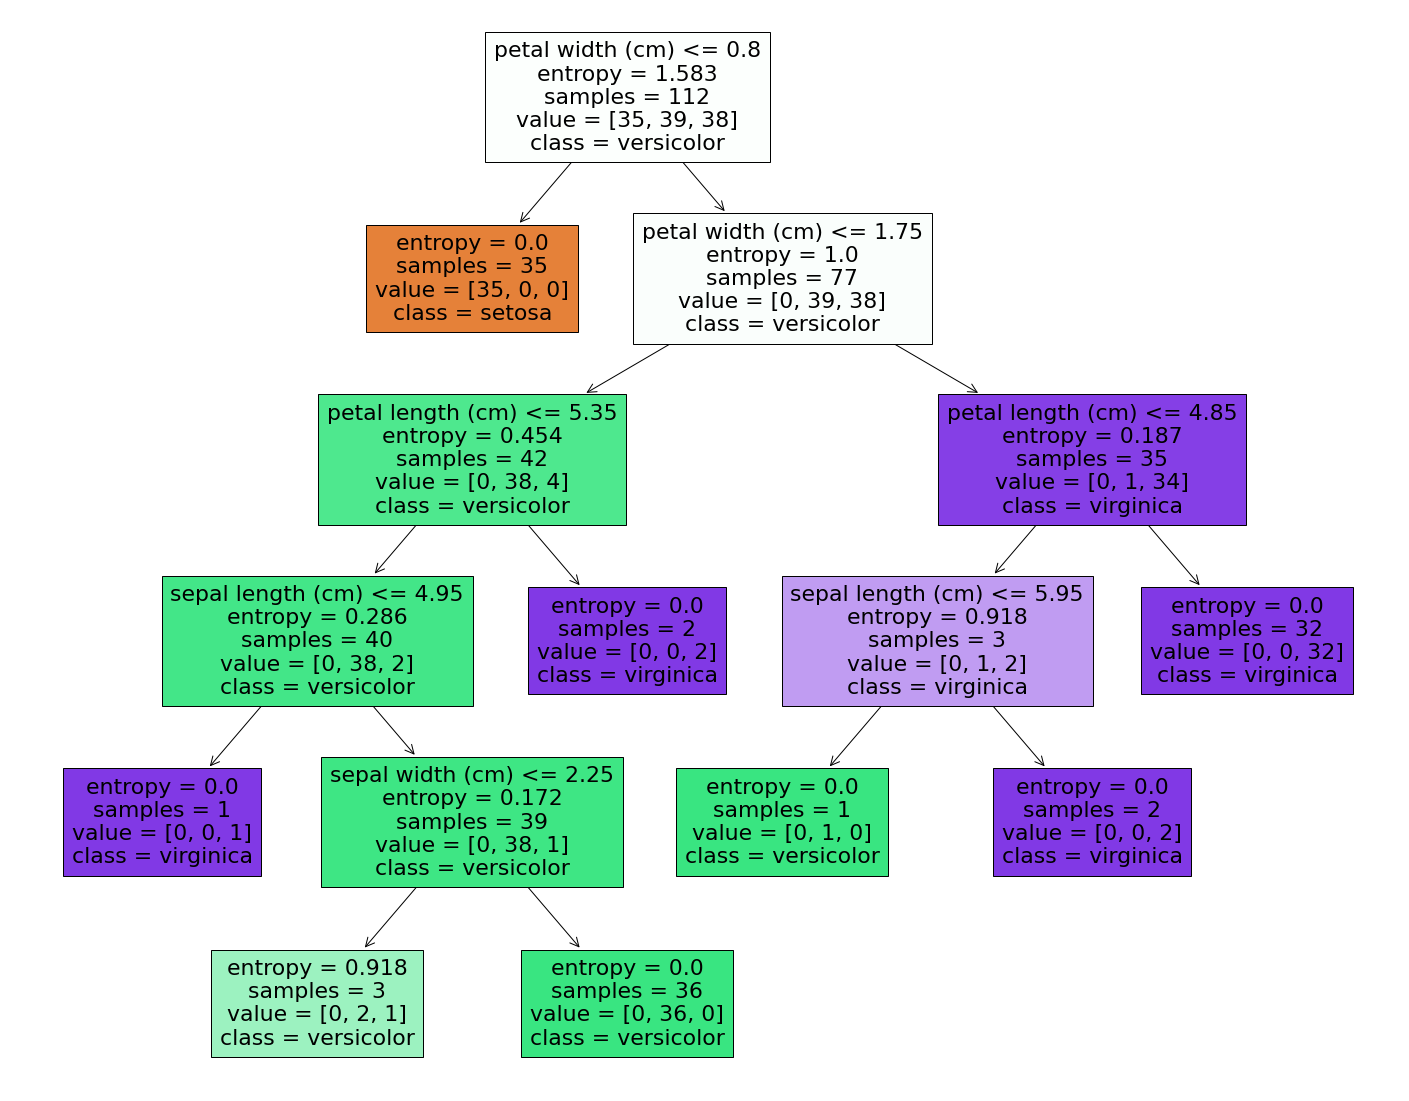

In [6]:
# Визуализируем полученное дерево
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [7]:
# accuracy_score модели
model.score(X_test, y_test)

0.9473684210526315

In [8]:
# Попробуем прогнать параметр глубины дерева по циклу
max_depth_data = range(1, 50)
# датафрейм для записи scores
scores_data = pd.DataFrame()

for max_depth in max_depth_data:
    
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [9]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.660714,0.684211
0,2,0.955357,0.973684
0,3,0.973214,0.973684
0,4,0.991071,0.947368
0,5,0.991071,0.947368


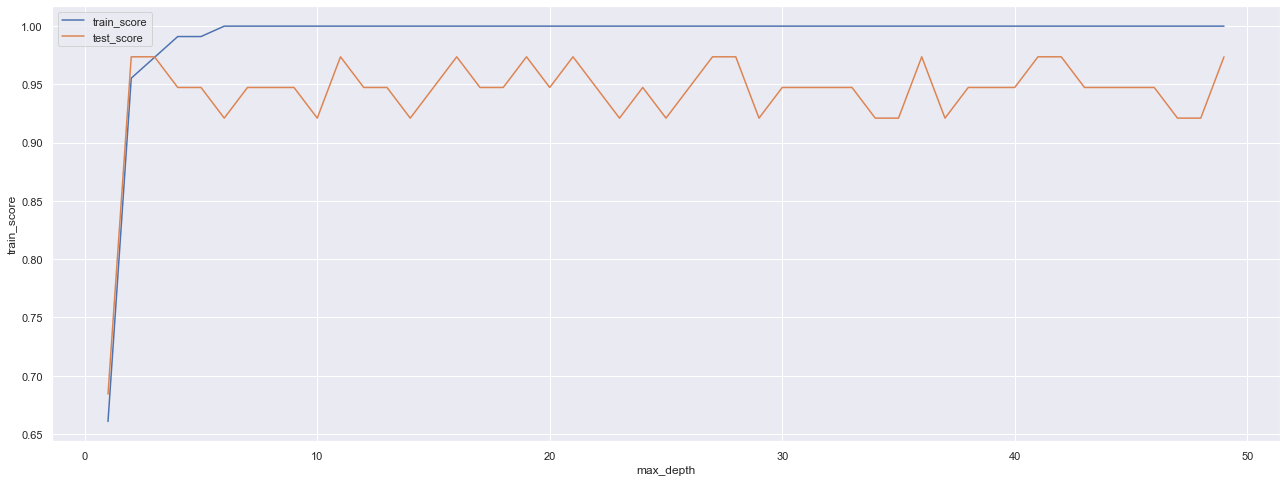

In [10]:
# посмотрим на зависимсть score по train и test данным
sns.set(rc={'figure.figsize':(22,8)})
sns.lineplot(data = scores_data,  x = 'max_depth', y = 'train_score', label = 'train_score')
sns.lineplot(data = scores_data,  x = 'max_depth', y = 'test_score', label = 'test_score')
plt.legend()
plt.show()

При определенном значении глубины дерева train_score растет и достигает макс. значения, но при этоме test_score ведет себя по разному. Модель "переобучилась". То есть модель очень хорошо находит закономерности на данных для обучения, но не может перенести их на новые данные. 

## Валидация модели
Способы избежать переобучения моделей. Таких способов очень много. \
Один из таких способов - **кроссвалидация (перекрестная проверка)** (https://scikit-learn.org/stable/modules/cross_validation.html). Данные делятся на несколько частей:
- для обучения
- для валидации (подбора параметров)
- для теста

In [11]:
# еще раз пострим модель, например, с такими параметрами
np.random.seed(0)
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [12]:
# Функция cross_val_score делит данные (X_train, y_train) на 5 частей (cv=5), одна из часте часть (всегда разная)
# используется как тестовые данные, а остальные 4 как тренировочные. 
# Получится, что каждый кусок данных будет использован и в обучении, и в тесте
cross_val_score(model, X_train, y_train, cv=5 )

array([1.        , 0.91304348, 0.90909091, 0.95454545, 0.90909091])

In [13]:
# можем посчитать усредненное значение score
cross_val_score(model, X_train, y_train, cv=5 ).mean()

0.9371541501976285

**Перекрестная проверка не возвращает модель: кросс-валидация не является способом построения модели, которую можно применить к новым данным. При вызове cross_val_score строится несколько внутренних моделей, однако цель перекрестной проверки заключается только в том, чтобы оценить обобщающую способность данного алгоритма, обучив на определенном наборе данных.**

In [14]:
# еще раз прогоноим по циклу, но уже с cross_val_score
max_depth_data = range(1, 50)
# датафрейм для записи scores
scores_data = pd.DataFrame()
np.random.seed(0)
for max_depth in max_depth_data:
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score], 
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [15]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.660714,0.684211,0.660870
0,2,0.955357,0.973684,0.937154
0,3,0.973214,0.973684,0.937154
0,4,0.991071,0.947368,0.937154
0,5,0.991071,0.947368,0.937154


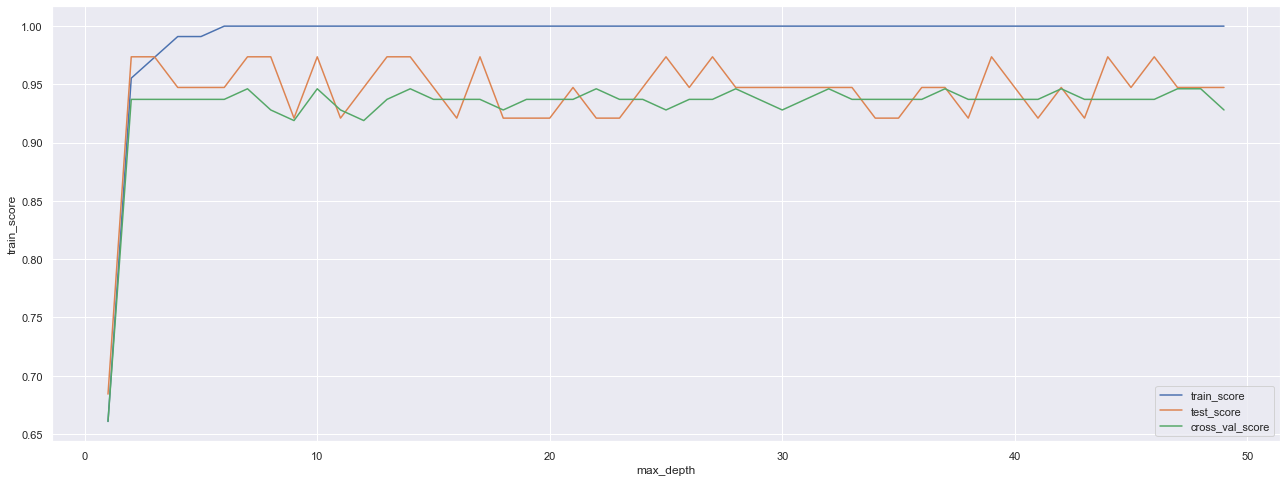

In [16]:
# посмотрим визуально
sns.set(rc={'figure.figsize':(22,8)})
sns.lineplot(data = scores_data,  x = 'max_depth', y = 'train_score', label = 'train_score')
sns.lineplot(data = scores_data,  x = 'max_depth', y = 'test_score', label = 'test_score')
sns.lineplot(data = scores_data,  x = 'max_depth', y = 'cross_val_score', label = 'cross_val_score')
plt.legend()
#plt.grid()
plt.show()

In [17]:
# Возьмем глубину дерева при максимальном значении cross_val_score
scores_data[scores_data.cross_val_score == scores_data.cross_val_score.max()].sort_values('max_depth').head(5)

,max_depth,train_score,test_score,cross_val_score
0,7,1.0,0.973684,0.946245
0,10,1.0,0.973684,0.946245
0,14,1.0,0.973684,0.946245
0,22,1.0,0.921053,0.946245
0,28,1.0,0.947368,0.946245


In [18]:
# max_depth
max_depth = scores_data[scores_data.cross_val_score == scores_data.cross_val_score.max()].sort_values('max_depth').head(1)['max_depth'][0]

In [19]:
max_depth

7

In [20]:
# Зная оптимальное значение глубины дерева сделаем модель с наилучшими параметрами
best_model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

In [21]:
# протестим модель на тестовых данных
cross_val_score(best_model, X_test, y_test, cv=5 ).mean()

0.9464285714285714

In [22]:
# Обучим на тренировочной выборке и замеряем точность на тестовой.
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.9736842105263158

In [23]:
# Предсказанные значение можно вывести с помощью метода
predicted = best_model.predict(X_test)
predicted

array([1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1])

In [24]:
# accuracy_score можно посчитать еще так
accuracy_score(y_test, predicted)

0.9736842105263158

Для того, чтобы все это не считать вручную (как проделано выше) есть спецальный класс GridSearchCV\
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Он не создает модель, а позволяет подобрать оптимальные параметры для созданной модели: перебирает каждое из сочетаний параметров среди заданных, обучает её на данных и проводит кросс-валидацию. Применимо не только к деревьям, но и к другим моделям sklearn.

In [25]:
# Создаем заново модель, только на этот раз с параметрами по умолчанию
model = DecisionTreeClassifier()

In [26]:
# Подготовтим словарь с параметрами
params = {'criterion': ['gini', 'entropy'], 'max_depth':range(0,50)}

In [27]:
# Создаем экземпляр класса GridSearchCV в который передаем модель и параметры, которые будут подбираться
grid_search_sv = GridSearchCV(model, params, cv=5)

In [28]:
# Обучим на трейн данных
grid_search_sv.fit(X_train, y_train)

C:\Users\i_a_f\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\i_a_f\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\i_a_f\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\i_a_f\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\i_a_f\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wi

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 50)})

In [29]:
# Посмотрим на наилучшие параметры, которые нашел GridSearchCV
grid_search_sv.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [30]:
# теперь можем создать дерево с наилучшими параметрами
best_model = grid_search_sv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=5)

In [31]:
# точность модели на тестовых данных
best_model.score(X_test, y_test)

0.9473684210526315

Высокое значение accuracy не всегда говорит о качестве модели (например, в случае неравномерного распределения классов). Поэтому необходимо проверит и другие метрики качества.\
https://scikit-learn.org/stable/modules/model_evaluation.html

In [32]:
# Предсказанные значения
predicted = best_model.predict(X_test)
predicted

array([1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1,
       1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1])

In [41]:
# метрика качества precision_score
precision_score(y_test, predicted, average = 'micro')

0.9473684210526315

In [42]:
# метрика качества recall_score
recall_score(y_test, predicted, average = 'micro')

0.9473684210526315

Модель, помимо отнесения к определенному классу, показывает еще и верояность этого

In [35]:
predicted_prob = best_model.predict_proba(X_test)
predicted_prob

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.

Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи, когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.\
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative, соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу этих параметров называют confusion matrix.\
В sklearn можно её удобно получить с помощью функции confusion_matrix. \
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  1, 11]], dtype=int64)

#### Еще параметры для дерева
Помимо глубины дерева есть еще важные параметры:
- min_samples_leaf - минимальное количество элементов в семпле, который далее еще можно делить
- min_samples_split - минимально допустимое количество элментов в конечном семпле

## Random forest
Недостаток дерева решений (любое дерево всегда стремится "переобучиться") можно устранить, если вместо одного дерева использовать несколько. Такой спосбом называется **Random forest**.

Данные разбиваются на несколько частей (=количеству деревьев) как по строкам, так и по фичам. Каждое дереыо обучается на "своих" данных, а в итог попадает среднее значение вероятностей по каждой модели дерева.

Параметры (глубина и др.) у всех этих деревьев будут одинаковыми.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

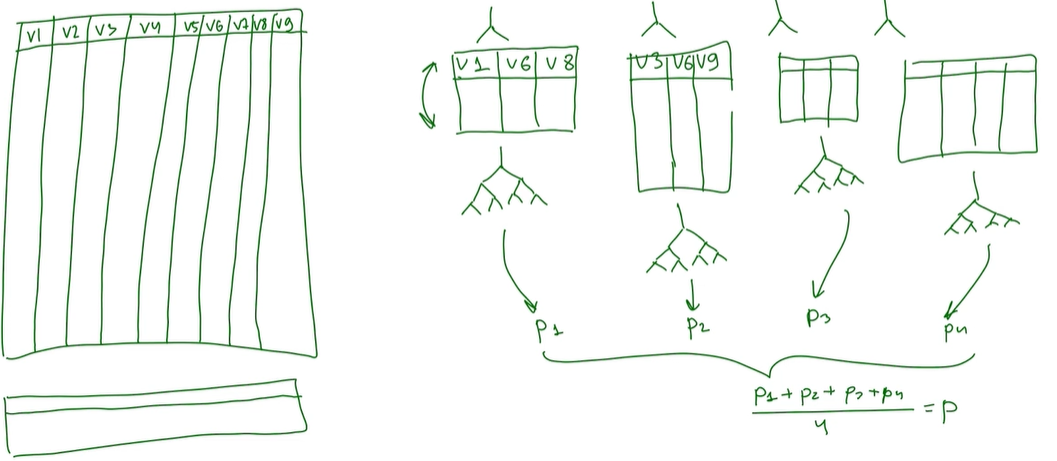

In [37]:
# создадим экземпляр класса рандом форест
model_rf = RandomForestClassifier()
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}
# к нему также можно применять GridSearchCV для подбора оптимальных параметров
grid_search_cv = GridSearchCV(model_rf, parametrs, cv=5)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [38]:
# построим лес с подобранными параметрами
model_rf = RandomForestClassifier(n_estimators=30, max_depth=2)
model_rf.fit(X_test, y_test)

RandomForestClassifier(max_depth=2, n_estimators=30)

In [39]:
# Важность признаков в модели
model_rf.feature_importances_

array([0.08603194, 0.0499628 , 0.44164241, 0.42236285])

<AxesSubplot:>

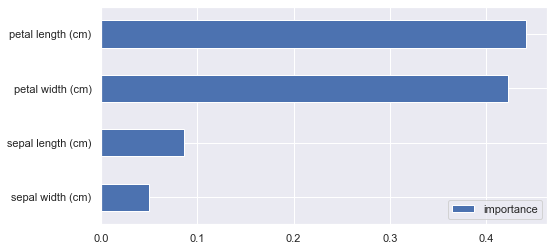

In [40]:
# # Важность признаков в модели - графически
imp = pd.DataFrame(model_rf.feature_importances_, index=iris.feature_names, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 4))